In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [37]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [38]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [3]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [23]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [49]:
df['Classes'].value_counts()


Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fi             1
not fire           1
not fire           1
Name: count, dtype: int64

In [4]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [109]:
df['Classes'].value_counts()

Classes
1    138
0    105
Name: count, dtype: int64

In [5]:
X=df.drop(['FWI'],axis=1) #Independent features
y=df['FWI']  #Dependent features

In [56]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [111]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [57]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [6]:
#Splitting data into traning and for testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [113]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [114]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.545416,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.459824,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.080890,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369893,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.779514,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.611209,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.534744,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.735598,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.605243,0.114897
Classes,0.545416,-0.459824,-0.080890,-0.369893,0.779514,0.611209,0.534744,0.735598,0.605243,1.000000,0.200234


<Axes: >

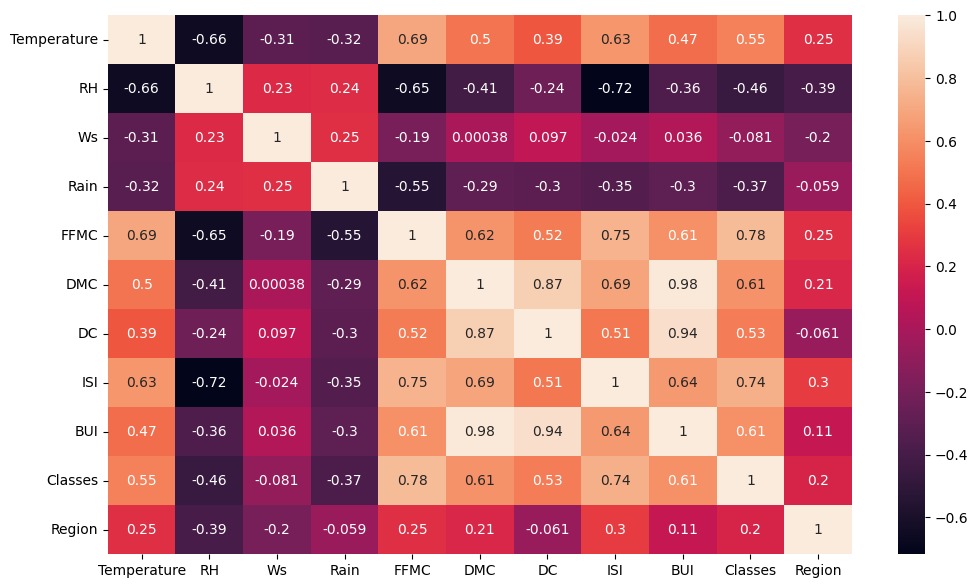

In [115]:
plt.figure(figsize=(12,7))
sns.heatmap(X_train.corr(),annot=True)


In [116]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.545416,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.459824,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.080890,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369893,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.779514,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.611209,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.534744,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.735598,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.605243,0.114897
Classes,0.545416,-0.459824,-0.080890,-0.369893,0.779514,0.611209,0.534744,0.735598,0.605243,1.000000,0.200234


In [7]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [8]:
#Feature selection
col_features=correlation(X_train,0.85)

In [127]:
col_features

set()

In [9]:
X_train.drop(col_features,axis=1,inplace=True)
X_test.drop(col_features,axis=1,inplace=True)

In [11]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
X_train_scaled=scaler.fit_transform(X_train)


In [13]:
X_test_scaled=scaler.transform(X_test)

In [14]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.11665285, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.11665285,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.89553347,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.11665285, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.89553347,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.11665285, -0.98907071]], shape=(182, 9))

Text(0.5, 1.0, 'After scaling X_train')

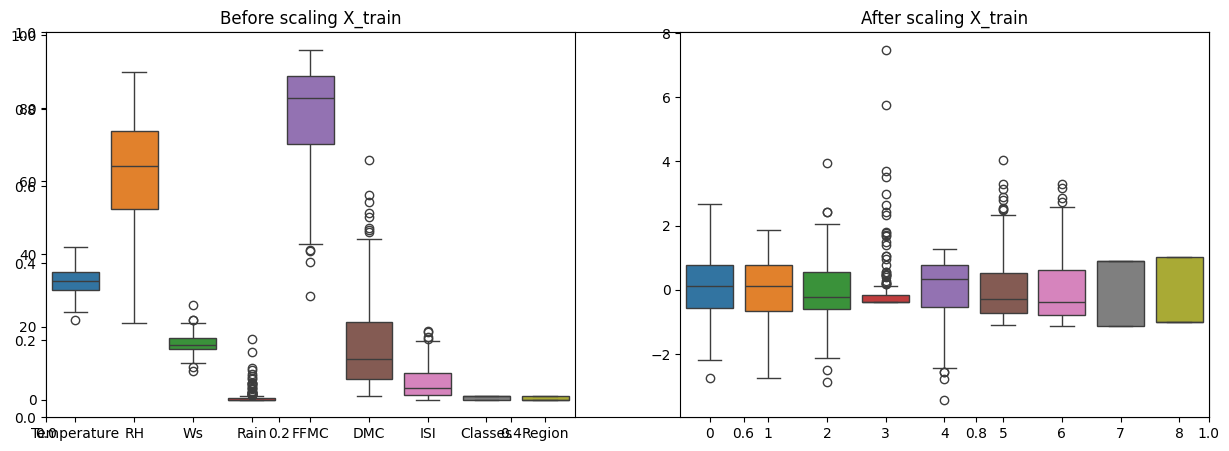

In [134]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Before scaling X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("After scaling X_train")

In [132]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.629848,0.545416,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.717804,-0.459824,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,-0.023558,-0.080890,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.345707,-0.369893,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.750799,0.779514,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.685656,0.611209,0.212582
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,1.000000,0.735598,0.296441
Classes,0.545416,-0.459824,-0.080890,-0.369893,0.779514,0.611209,0.735598,1.000000,0.200234
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,0.296441,0.200234,1.000000


Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()

mae 0.54789087761546
mse 0.6733386091573326
r2 Score 0.9847869328848086


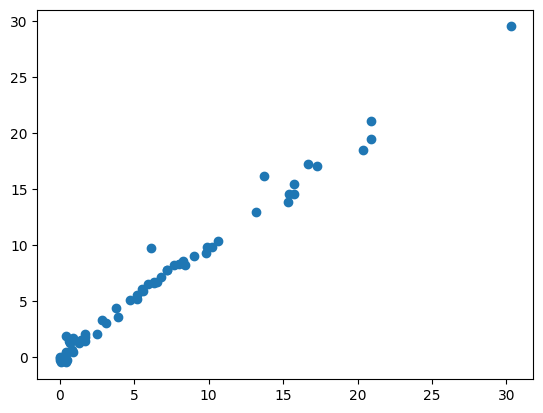

In [16]:
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("mae",mae)
print("mse",mse)
print("r2 Score",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

Ridge Regression Model

In [17]:
from sklearn.linear_model import Ridge
ridreg=Ridge()
ridreg.fit(X_train_scaled,y_train)
y_pred=ridreg.predict(X_test_scaled)


mae 0.5627806721434808
mse 0.692899313254065
R2score 0.9843449883710128


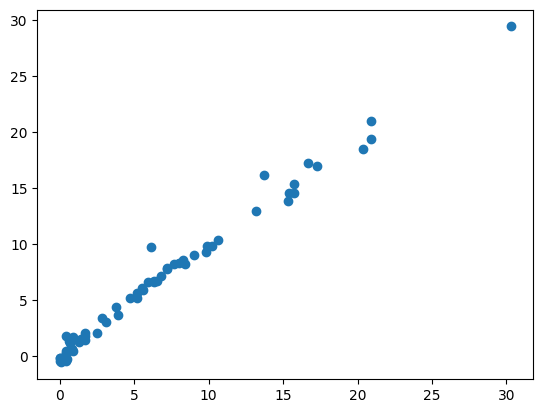

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("mae",mae)
print("mse",mse)
print("R2score",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)


In [162]:
from sklearn.linear_model import RidgeCV
ridcv=RidgeCV(cv=5)
ridcv.fit(X_train_scaled,y_train)
y_pred=ridcv.predict(X_test_scaled)


mae 0.5627806721434808
mse 0.692899313254065
R2score 0.9843449883710128


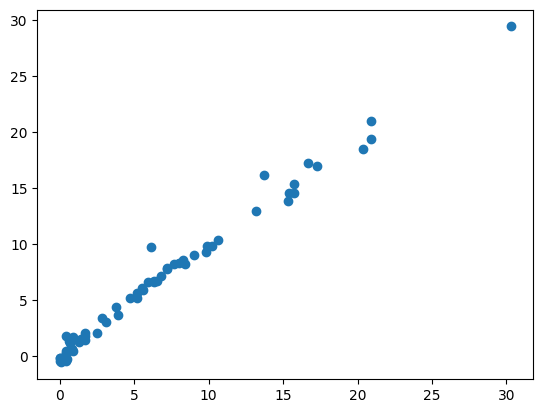

In [163]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("mae",mae)
print("mse",mse)
print("R2score",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

Lasso Regression

In [166]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)

mae 1.133175994914409
mse 2.2483458918974772
R2score 0.9492020263112388


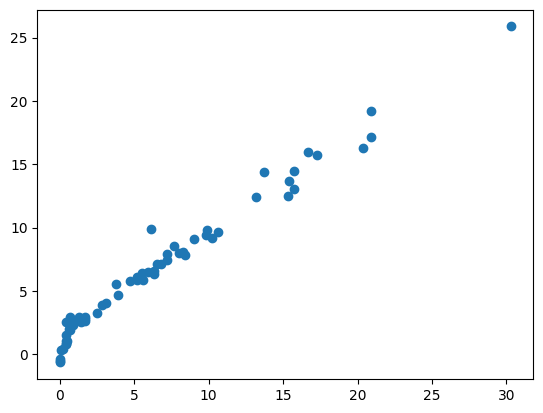

In [165]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("mae",mae)
print("mse",mse)
print("R2score",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

In [167]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred=lassocv.predict(X_test_scaled)

mae 0.6130816551546681
mse 0.7812222308119852
R2score 0.9823494656810251


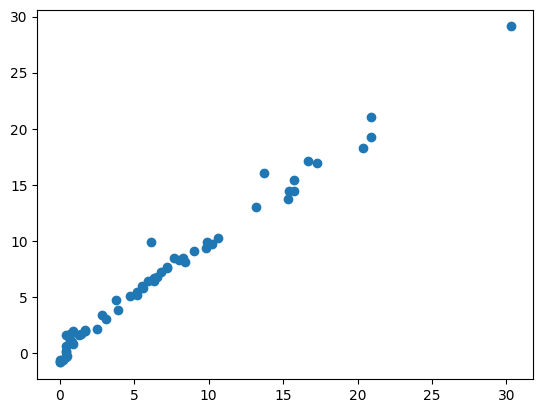

In [168]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("mae",mae)
print("mse",mse)
print("R2score",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

In [169]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)

mae 1.8750432214887633
mse 5.4863336159281415
R2score 0.8760445927497031


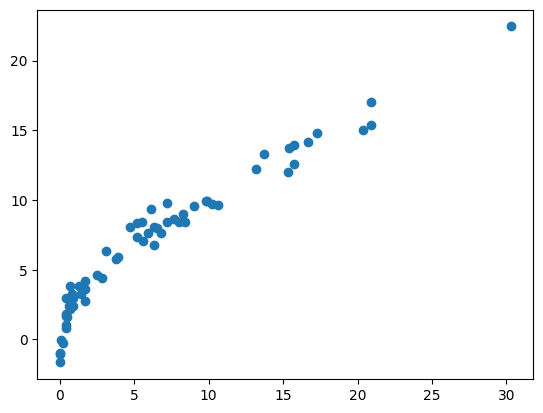

In [170]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("mae",mae)
print("mse",mse)
print("R2score",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

In [171]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)

mae 0.653842485425515
mse 0.8181898573908999
R2score 0.981514238090351


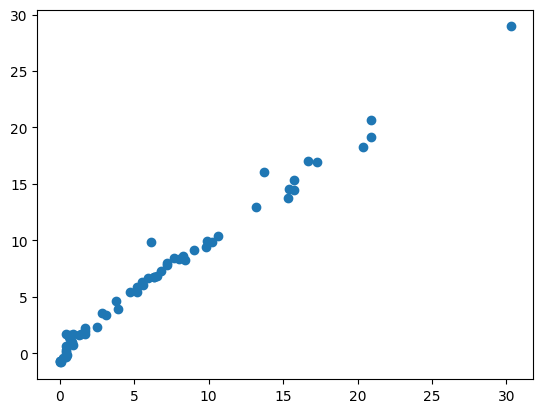

In [172]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("mae",mae)
print("mse",mse)
print("R2score",r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

In [19]:
import pickle

In [20]:
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridreg,open("ridge.pkl","wb"))

In [21]:
#Load scaler
scaler_loaded=pickle.load(open("scaler.pkl","rb"))

#Load Rigdemodel
ridge_loaded=pickle.load(open("ridge.pkl","rb"))

In [22]:
scaled_test_data=scaler_loaded.transform(X_test)
prediction=ridge_loaded.predict(scaled_test_data)

In [23]:
print(prediction)

[ 8.23502715  7.7677102  -0.22620934  4.38579472  6.71363449  1.37642157
  2.07633649  7.85398745  1.71308616  3.39238949  0.45937398  9.76898482
  9.34048335 17.0231174  18.47295198  1.31013837  1.83085874 -0.14099516
  7.18983077  3.11532121  1.46052274  0.2054224   6.60264856  0.3347311
 20.98992852  5.18345178  5.96091507  9.8194822  -0.17456619  9.81976033
  6.65198989 -0.43729552 10.40706257 14.57200222  1.52859831  0.47348947
  2.08088788  6.14435068 -0.53537734 -0.31770178  6.7221337   1.83076808
  8.60352706 -0.36569618 15.41026523  8.33862587  8.26428013  1.42167873
 12.96490029  1.24491511 29.42098665  5.61696928 17.23813782 19.40630105
 13.82063786 16.1932339   0.69438283  9.03261486  3.65699759 14.61474631
  5.23419952]


In [24]:
ridge_loaded.score(scaled_test_data,y_test)

0.9843449883710128